In [1]:
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Load MNIST dataset
X, y  = fetch_openml(data_id=554, parser='auto', return_X_y=True) # https://www.openml.org/d/554

# Select only 0s and 8s
num=['0','8']
y1 = y.isin(num)
indices = y1[y1].index
X = X.loc[indices]
y = y.loc[indices]

# Reset index after class selection
X.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### dimensionality reduction to 2 features using _PCA_

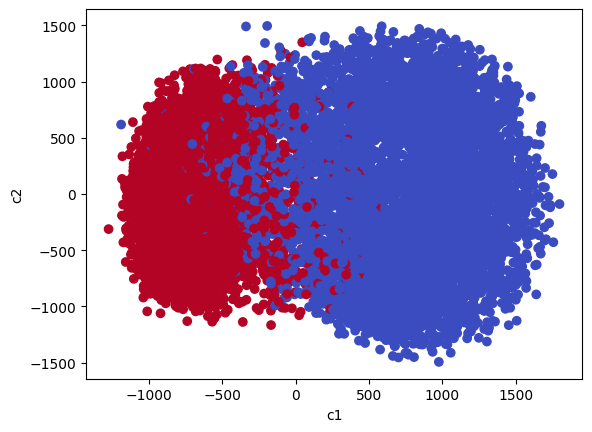

In [3]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot the 2 new features generated by PCA
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train.astype('int32'), cmap='coolwarm')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()

Number of mislabeled points out of a total 2746 points : 126
Accuracy: 0.9541150764748726
F1 Score: 0.9541153929011341


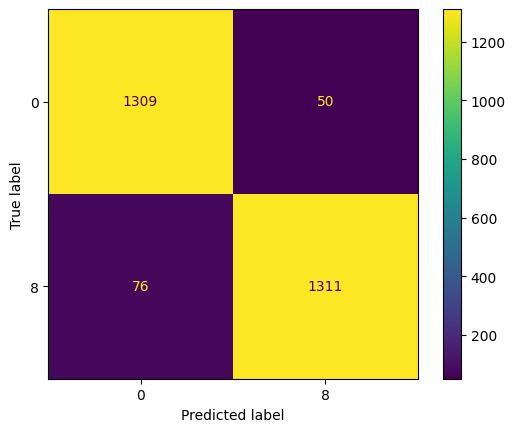

In [4]:
model = LogisticRegression()

# Model training
model.fit(X_train_pca, y_train)

# Predict Output
y_pred = model.predict(X_test_pca)

print("Number of mislabeled points out of a total %d points : %d" % (X_test_pca.shape[0], (y_test != y_pred).sum()))

y_pred = model.predict(X_test_pca)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred, y_test),
                              display_labels=model.classes_)

disp.plot()

### dimensionality reduction to 2 features using _SVD_

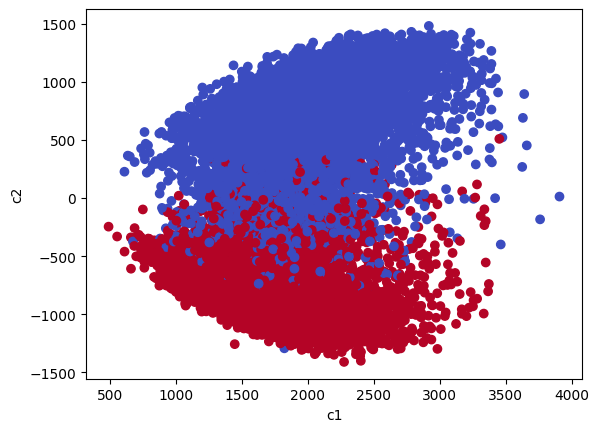

In [7]:
# Apply SVD with 2 components
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Plot the 2 new features generated by SVD
plt.scatter(X_train_svd[:,0], X_train_svd[:,1], c=y_train.astype('int32'), cmap='coolwarm')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()

Number of mislabeled points out of a total 2746 points : 126
Accuracy: 0.9541150764748726
F1 Score: 0.9541153929011341


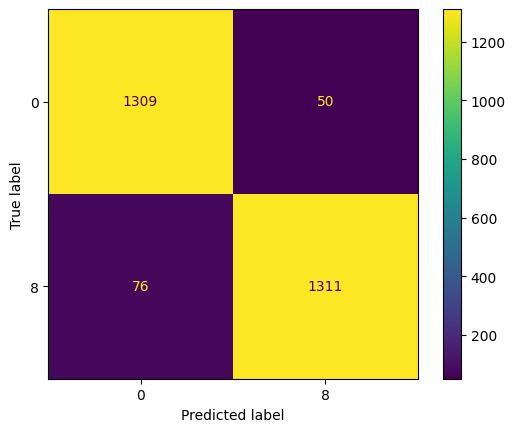

In [8]:
model = LogisticRegression()

# Model training
model.fit(X_train_pca, y_train)

# Predict Output
y_pred = model.predict(X_test_pca)

print("Number of mislabeled points out of a total %d points : %d" % (X_test_pca.shape[0], (y_test != y_pred).sum()))

y_pred = model.predict(X_test_pca)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred, y_test),
                              display_labels=model.classes_)

disp.plot()

### How different are these results from those of your implementation? Why?

We can see that this results are exacly the same as the ones obtained with the methods from the package unsupervised 

The only difference between both is that running the skit-learn methods over the data is faster and more efficient than the ones in the unsupervised package